# Data Preprocessing Lab


>To build a proper machine learning model we need clean data. However, almost all the datasets are dirty due to noise, outliers. It is also important to know the data to use the appropriate machine learning algorithm. Thus, in this exercise, we will try to explore the data, clean the data, find
insights, and finally train machine learning models.

1. There are so many data cleaning techniques, however, we will only focus on the most basic operations

2. There are some questions prepared for you to answer. Please double click on those cells and answer them.

3. To do this workshop you may use any IDE of your choice such as jupyter notebook, google colab or even VS code. However, it is recommended to avoid using tools that utilizes AI featuers such as auto code generation.

# Datasets Information

It is very important to undertand what kind of data we are dealing with before jumping into actual coding. The following things are to be taken into consideration before EDA and Model Training :

1. Understanding Data Source & Reliability

2. Understanding Features & Their Role

3. Ensuring Data Relevance for the Problem



## Dataset 1 : **Medical Students**

* About Dataset

> The dataset can be used for various purposes, including :

1. Medical research and analysis to identify patterns, trends, and correlations in patient data.
Developing predictive models for diagnosing diseases, predicting treatment outcomes, and identifying at-risk patients.

2. Evaluating the effectiveness of different medical interventions and treatment protocols.

3. Training machine learning algorithms for medical imaging analysis, disease classification, and patient risk stratification.

> The dataset consists of the following columns:

*  *StudentID:* Unique identifier for each medical student.

*  *Age:* Age of the student in years.

* *Gender:* Gender of the student (e.g., Male, Female).

* *Height:* Height of the student in cm.

* *Weight:* Weight of the student in kg.

* *Blood Type:* The student's blood group (e.g., A, B, O).

* *BMI:* The Body Mass Index, calculated from height and weight.

* *Temperature:* The student's body temperature in degrees Celsius.

* *Heart Rate:* The number of heartbeats per minute.

* *Blood Pressure:* The student's systolic blood pressure measurement.

* *Cholesterol:* The student's cholesterol level in mg/dL.

* *Diabetes:* Indicates whether the student has diabetes (Yes/No).

* *Smoking* Indicates whether the student is a smoker (Yes/No).


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# # Connect Google Drive to Google Colab
# from google.colab import drive
#drive.mount('/content/drive/MyDrive/sample_medical_students_dataset.csv')

# Part I

### 1. Import Necessary Libraries/Dependencies

> In the below cell, you are required to import all the necessary dependencies such as pandas, matplotlib as well as seaborn.

In [3]:
# Importing the pandas library, used for data manipulation and analysis
import pandas as pd
# Importing the numpy library, used for numerical operations and working with arrays
import numpy as np
# Importing the seaborn library, used for statistical data visualization
import seaborn as sns
# Importing the pyplot module from matplotlib, used for creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt

### 2. Load our dataset

> In the below, cell you are required to load our dataset into a pandas dataframe.

In [4]:
# Lod the dataset (CSV file)
df1 = pd.read_csv("/content/drive/MyDrive/sample_medical_students_dataset.csv") # csv filename : sample_medical_students_dataset.csv

In [5]:
df1.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,48419.0,34.0,Male,172.793930,43.761668,O,14.656724,99.080335,92.0,118.0,167.0,Yes,No
1,64979.0,25.0,Female,155.370924,53.658217,AB,22.227813,98.238156,67.0,98.0,124.0,No,No
2,37531.0,24.0,Male,177.065466,41.897201,B,13.363410,99.243096,79.0,126.0,223.0,No,Yes
3,36473.0,34.0,Male,187.403636,83.172918,AB,23.682411,98.462143,65.0,95.0,160.0,No,No
4,13960.0,29.0,Male,NaN,92.665678,AB,35.423958,98.450508,75.0,111.0,163.0,No,No


In [6]:
df1.describe()

,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,50000.000000,49934.000000,48752.000000,50000.000000,50000.000000,50000.000000,48362.000000,50000.000000,50000.000000
mean,49835.464140,26.028578,174.898147,69.992555,23.365428,98.599156,79.513440,114.526160,184.268900
std,28801.118493,4.883655,14.429881,17.310689,7.063461,0.499875,11.518227,14.372229,37.692965
min,2.000000,18.000000,150.002125,40.000718,10.074837,96.397835,60.000000,90.000000,120.000000
25%,24825.750000,22.000000,162.511419,54.976175,17.840544,98.262937,70.000000,102.000000,152.000000
50%,49751.500000,26.000000,174.782445,70.073127,22.715855,98.598631,79.000000,115.000000,184.000000
75%,74715.250000,30.000000,187.456113,85.007916,28.063988,98.940004,89.000000,127.000000,217.000000
max,99999.000000,34.000000,199.998639,99.997668,44.355113,100.773765,99.000000,139.000000,249.000000


### 3. Data Analysis

> Print the list feature names of our loaded dataset.

In [7]:
# Get column names of the DataFrame
print(df1.columns.tolist())

['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol', 'Diabetes', 'Smoking']


> Print the shape of our dataset (number of rows and columns)

In [8]:
# Check the shape of our dataset
shape = df1.shape
print("Shape = {}".format(shape))

Shape = (50000, 13)


> Display the first 5 rows of our dataset. *Hint : head() method*

In [9]:
df1.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,48419.0,34.0,Male,172.793930,43.761668,O,14.656724,99.080335,92.0,118.0,167.0,Yes,No
1,64979.0,25.0,Female,155.370924,53.658217,AB,22.227813,98.238156,67.0,98.0,124.0,No,No
2,37531.0,24.0,Male,177.065466,41.897201,B,13.363410,99.243096,79.0,126.0,223.0,No,Yes
3,36473.0,34.0,Male,187.403636,83.172918,AB,23.682411,98.462143,65.0,95.0,160.0,No,No
4,13960.0,29.0,Male,NaN,92.665678,AB,35.423958,98.450508,75.0,111.0,163.0,No,No


> Display 5 random rows of our dataset. *Hint : sample() method*

In [10]:
df1.sample(n=5)

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
35692,84033.0,31.0,Male,166.788911,96.538205,B,34.702828,98.283233,72.0,102.0,201.0,No,Yes
33455,31137.0,19.0,Female,176.557098,72.076906,AB,23.122020,98.342346,80.0,116.0,143.0,No,Yes
2838,18809.0,21.0,Female,154.530415,86.372188,B,36.169789,98.208486,87.0,90.0,219.0,No,No
11452,90365.0,34.0,Female,162.974667,60.748348,AB,22.871480,98.313366,72.0,116.0,183.0,No,No
21136,53780.0,26.0,Male,177.404370,52.848899,AB,16.792189,98.253886,75.0,123.0,235.0,No,No


> Check datatypes of each columns. *Hint : dtypes*

In [11]:
df1.dtypes

,0
Student ID,float64
Age,float64
Gender,object
Height,float64
Weight,float64
Blood Type,object
BMI,float64
Temperature,float64
Heart Rate,float64
Blood Pressure,float64


> How many of our features are numerical and categorical ? Write a python code to fill the below 2 empty lists.

* num_cols : should contain name of columns with numerical data type.

* cat_cols : should contain name of columns with categorical data type.


In [12]:
num_cols=[i for i in df1.columns if df1[i].dtypes=="float64"]
cat_cols=[i for i in df1.columns if df1[i].dtypes=="object"]
# Your code here


In [13]:
print("Numerical columns : ", num_cols)
print("Categorical columns : ", cat_cols)
print("Number of numerical columns : ", len(num_cols))
print("Number of categorcal columns : ", len(cat_cols))

Numerical columns :  ['Student ID', 'Age', 'Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol']
Categorical columns :  ['Gender', 'Blood Type', 'Diabetes', 'Smoking']
Number of numerical columns :  9
Number of categorcal columns :  4


> Generate summary statistics our data that includes measurements like count, mean, standard deviation, minimum, maximum, and quartiles. *Hint : describe() method*

In [14]:
# Print some statistical measurements of our numerical columns
df1.describe()

,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,50000.000000,49934.000000,48752.000000,50000.000000,50000.000000,50000.000000,48362.000000,50000.000000,50000.000000
mean,49835.464140,26.028578,174.898147,69.992555,23.365428,98.599156,79.513440,114.526160,184.268900
std,28801.118493,4.883655,14.429881,17.310689,7.063461,0.499875,11.518227,14.372229,37.692965
min,2.000000,18.000000,150.002125,40.000718,10.074837,96.397835,60.000000,90.000000,120.000000
25%,24825.750000,22.000000,162.511419,54.976175,17.840544,98.262937,70.000000,102.000000,152.000000
50%,49751.500000,26.000000,174.782445,70.073127,22.715855,98.598631,79.000000,115.000000,184.000000
75%,74715.250000,30.000000,187.456113,85.007916,28.063988,98.940004,89.000000,127.000000,217.000000
max,99999.000000,34.000000,199.998639,99.997668,44.355113,100.773765,99.000000,139.000000,249.000000


> For categorical columns, we will check how many unique classes they have and how frequently each class appears in the dataset.

> Below is an example of one categorical class - Gender

In [15]:
# Count the occurrences of each unique value in the 'Gender' column of the DataFrame 'df1'
df1['Gender'].value_counts()

,count
Gender,
Female,24481
Male,24411


> Similarly do for the other categorical columns. *Hint : You might wana use the list you created for storing the categorical columns*

In [16]:
# Your code here
df1[cat_cols].value_counts()

Gender  Blood Type  Diabetes  Smoking
Female  B           No        No         4403
        O           No        No         4385
        A           No        No         4383
Male    A           No        No         4355
        AB          No        No         4340
        B           No        No         4319
        O           No        No         4256
Female  AB          No        No         4187
        B           No        Yes        1128
Male    B           No        Yes        1109
        O           No        Yes        1108
Female  O           No        Yes        1101
        AB          No        Yes        1068
Male    A           No        Yes        1055
        AB          No        Yes        1025
Female  A           No        Yes        1011
        B           Yes       No          489
Male    B           Yes       No          486
        O           Yes       No          478
Female  A           Yes       No          477
Male    A           Yes       No          468
        AB          Yes       No          466
Female  O           Yes       No          463
        AB          Yes       No          452
Male    B           Yes       Yes         132
        O           Yes       Yes         126
        A           Yes       Yes         125
Female  AB          Yes       Yes         125
        O           Yes       Yes         116
Male    AB          Yes       Yes         112
Female  A           Yes       Yes         110
        B           Yes       Yes         106
Name: count, dtype: int64

### 4. Cleaning Data

> Removing column 'Student ID' as it's not relevant for our analysis or modeling

In [17]:
# remove student Id column as it's not relevant for our analysis or modeling
df1.drop(columns=["Student ID"], inplace=True)

> Check how many rows are duplicated. *Hint : duplicated() and sum() method*

In [18]:
# check for duplicate data
df1.duplicated().sum()

5146

> Drop duplicate rows. *Hint : drop_duplicates() method*

In [19]:
# drop duplicate rows
print(f"Rows before removing duplicates: {df1.shape[0]}")
df1.drop_duplicates()
print(f"Rows after removing duplicates: {df1.shape[0]}")

Rows before removing duplicates: 50000
Rows after removing duplicates: 50000


> Check for null data. *Hint : isnull() and sum() method*

In [20]:
# Check for null data
df1.isnull().sum()

,0
Age,66
Gender,1108
Height,1248
Weight,0
Blood Type,0
BMI,0
Temperature,0
Heart Rate,1638
Blood Pressure,0
Cholesterol,0


> If null data are found we need to handle them accordingly. we can consider applying one of the below approaches:


1. Remove Rows with Missing Values

2. Fill Missing Values with mean, meadian or mode.

> *However, to complete this workshop you are required to take the second approach which means filling the null values with mean or median if the column is numerical or mode if it is categorical.*

**Note :** We use the mean to fill missing values in numerical columns when there are no outliers. If the column contains outliers, we use the median instead, as it is less affected by extreme values.

In [21]:
# example code to fill null values with mean
df1.loc[:, 'Age'] = df1['Age'].fillna(df1['Age'].mean())
df1['Age'].isnull().sum()

0

> Similarly do it for other columns cotaining null data

In [22]:
# filling null values for numerical columns

df1.loc[:, 'Height'] = df1['Height'].fillna(df1['Height'].mean())
df1['Height'].isnull().sum()

df1.loc[:, 'Heart Rate'] = df1['Heart Rate'].fillna(df1['Heart Rate'].mean())
df1['Heart Rate'].isnull().sum()

0

In [23]:
# filling null values for categorical columns
df1.loc[:, 'Gender'] = df1['Gender'].fillna(df1['Gender'].mode()[0])
df1['Gender'].isnull().sum()

df1.loc[:, 'Smoking'] = df1['Smoking'].fillna(df1['Smoking'].mode()[0])
df1['Smoking'].isnull().sum()

0

In [24]:
# Check for null data
df1.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
Blood Type,0
BMI,0
Temperature,0
Heart Rate,0
Blood Pressure,0
Cholesterol,0


> Check for outliers in numerical columns

* Outliers are data points that significantly differ from the rest of the dataset. They are unusually high or low values that do not follow the general pattern of the data.

* For example, in a dataset of students' heights, if most students are between 150 cm and 180 cm, but there is a student with a height of 250 cm, that is likely an outlier.

* Outliers needs to be handled as they can negatively impact machine learning models and statistical analysis.

* There are 3 approches we can take to identify outliers:

  1. Using Boxplots (Visualization)

  2. Using IQR (Interquartile Range)

  3. Using Z-score (Standard Deviation)


> For this workshop we are going to use the **IQR method** to detect outliers.

In [25]:
num_cols.remove("Student ID") # Removing 'Student ID' from the list.

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outliers[col] = outlier_count
    return outliers

# Detect outliers
outliers_iqr = detect_outliers_iqr(df1, columns=num_cols)

# Print number of outliers in each numerical column
print("Outliers detected using IQR method:")
for col, count in outliers_iqr.items():
    print(f"{col}: {count} outliers")

Outliers detected using IQR method:
Age: 0 outliers
Height: 0 outliers
Weight: 0 outliers
BMI: 39 outliers
Temperature: 342 outliers
Heart Rate: 0 outliers
Blood Pressure: 0 outliers
Cholesterol: 0 outliers


> Since BMI and Temperature have outliers, we can handle them by replacing outliers with the nearest valid values (min/max limits from IQR)

In [26]:
# Function to replace outliers with min/max based on IQR
def replace_outliers_with_min_max(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace lower outliers with the minimum valid value
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

    # Replace upper outliers with the maximum valid value
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

> Handle the outliers. *Hint : use the above replace_outliers_with_min_max() function*

In [27]:
# Apply to columns which have outliers
def replace_outliers_with_min_max(df1, column):
    Q1 = df1[column].quantile(0.25)  # First quartile (25%)
    Q3 = df1[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace lower outliers with the minimum valid value
    df1[column] = np.where(df1[column] < lower_bound, lower_bound, df1[column])

    # Replace upper outliers with the maximum valid value
    df1[column] = np.where(df1[column] > upper_bound, upper_bound, df1[column])
    return df1

df1 = replace_outliers_with_min_max(df1, "BMI")

In [28]:
# Apply to columns which have outliers
def replace_outliers_with_min_max(df1, column):
    Q1 = df1[column].quantile(0.25)  # First quartile (25%)
    Q3 = df1[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace lower outliers with the minimum valid value
    df1[column] = np.where(df1[column] < lower_bound, lower_bound, df1[column])

    # Replace upper outliers with the maximum valid value
    df1[column] = np.where(df1[column] > upper_bound, upper_bound, df1[column])
    return df1

df1 = replace_outliers_with_min_max(df1, "Temperature")

In [29]:
# Again check for outliers
outliers_iqr = detect_outliers_iqr(df1, columns=num_cols)
# Print number of outliers in each numerical column
print("Outliers detected using IQR method:")
for col, count in outliers_iqr.items():
    print(f"{col}: {count} outliers")

Outliers detected using IQR method:
Age: 0 outliers
Height: 0 outliers
Weight: 0 outliers
BMI: 0 outliers
Temperature: 0 outliers
Heart Rate: 0 outliers
Blood Pressure: 0 outliers
Cholesterol: 0 outliers


### 5. Data Visualisation

**Histogram of Age**

* A histogram is a graphical representation of the distribution of a dataset.
* It displays the frequency or count of data points that fall within certain ranges or bins.
* A histogram shows us the frequency distribution of continuous variables.

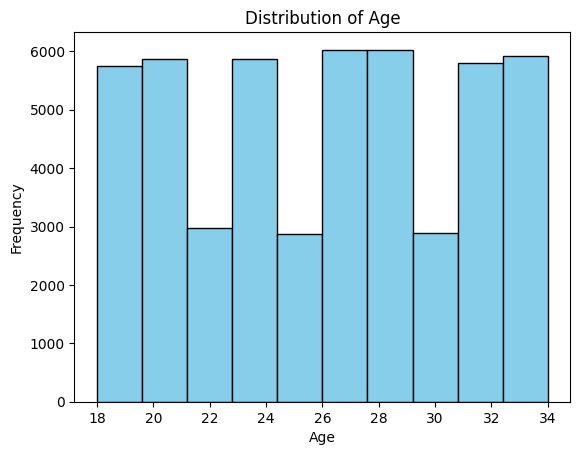

In [30]:
# Histogram for Age
plt.hist(df1['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

> What is the most common age range (peak of the histogram) ?

> Answer : The most common age range in the dataset is 26-29.

**Bar Plot for Gender Count**

* Bar plots are used to represent categorical data with rectangular bars, where the length or height of each bar is proportional to the value of the category it represents.

* They are ideal for comparing different categories (e.g., counts of different genders, countries, or product sales).

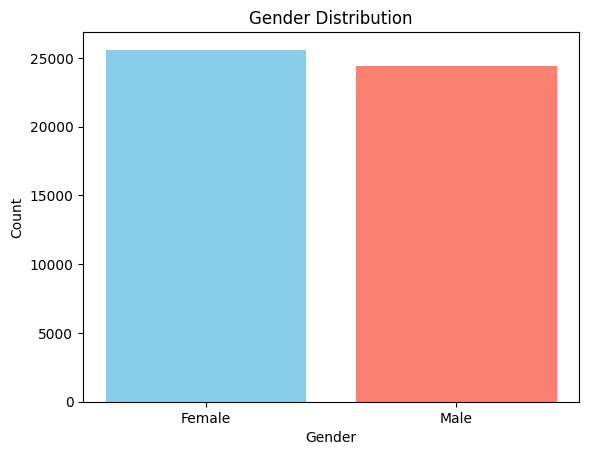

In [31]:
# Bar plot for Gender
gender_counts = df1['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'salmon'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

> 1. Which gender has the highest count?

> Answer : The gender "Female" has the highest count.

> 2. Is the distribution balanced, or is there a significant difference between genders?

> Answer : The distribution of both genders in the dataset are relatively similar, so this dataset is a balanced dataset.

**Box Plot of BMI**

> A box plot is a graphical representation of the distribution of numerical data through five key summary statistics: the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum.

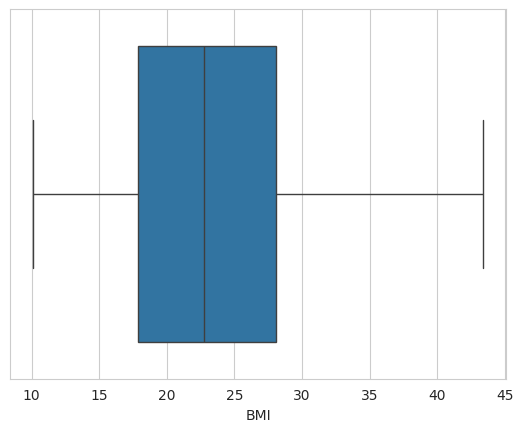

In [32]:
# Set the seaborn plot style to whitegrid
sns.set_style("whitegrid")
# Create a box plot of the "Weight" column of the DataFrame
sns.boxplot(x = df1["BMI"])
plt.show()

> 1. What is the median BMI (the middle line in the box)?

> Answer : The median BMI is 23.

> 2. What is the interquartile range (IQR) (distance between Q1 and Q3)?

> Answer : Since the formula to calculate IQR is Q3-Q1, we can visualize from the above boxplot that Q3 is 44 and Q1 is 10, the difference between Q3 and Q1 is 34.

> 3. Are there any outliers (points outside the whiskers)?

> Answer : No, there are no outliers present.

**Scatter plot for BMI vs. Weight**

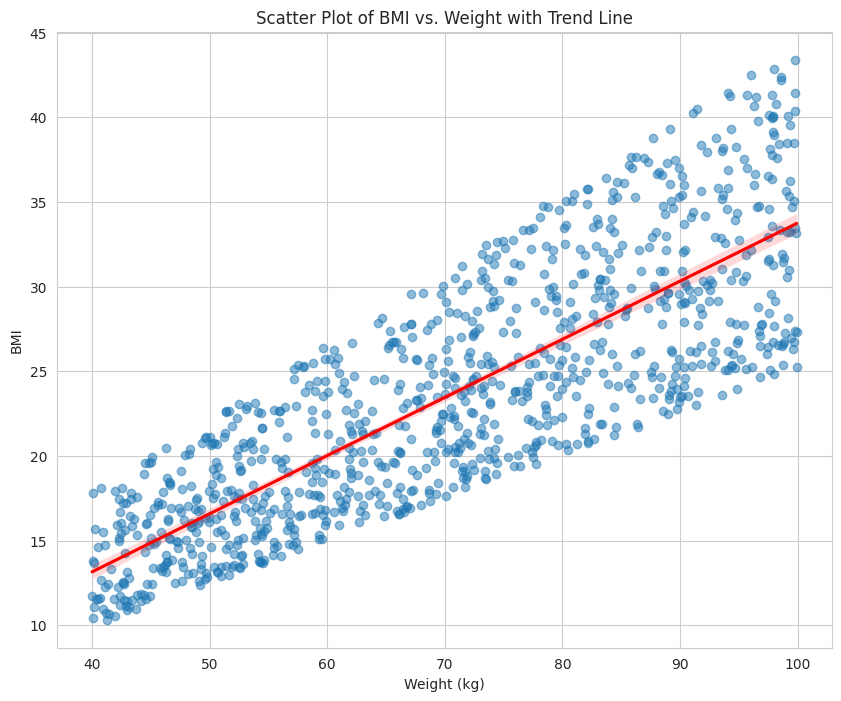

In [33]:
# Randomly sample 1000 rows from the DataFrame 'df1' and store it in 'df_sampled'
df_sampled = df1.sample(1000)
# Set the figure size for the plot
plt.figure(figsize=(10, 8))
# Create a regression plot (scatter plot with a trend line) for 'Weight' vs 'BMI'
# scatter_kws controls the transparency of the scatter points, and line_kws sets the color of the trend line
sns.regplot(x=df_sampled['Weight'], y=df_sampled['BMI'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
# Set the title of the plot
plt.title('Scatter Plot of BMI vs. Weight with Trend Line')
# Set the labels for the x and y axes
plt.xlabel('Weight (kg)')
plt.ylabel('BMI')
# Enable grid lines on the plot
plt.grid(True)
# Display the plot
plt.show()

> 1. Does the scatter plot confirm a strong positive correlation between Weight and BMI?

> Answer : Yes, since when weight increases, BMI also increases accordingly, so the scatter plot confirms a strong positive correlation between Weight and BMI

> 2. Is the red trend line steep or gradual? What does that indicate about how weight affects BMI?

> Answer : The above trend line is a positive trend line, meaning, its gradual. This line represents that as weight increases, BMI increases accordingly.

**Pie Chart for Blood Type Distribution**

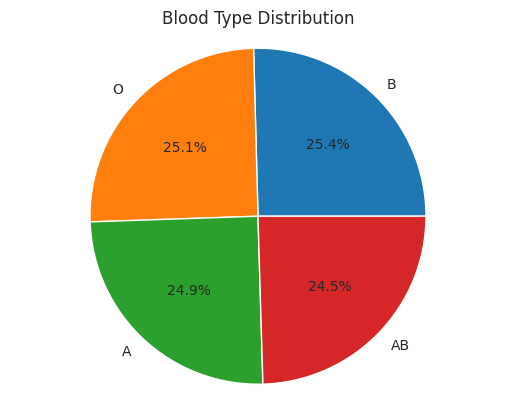

In [34]:
# Pie chart for Blood Type distribution
blood_type_counts = df1['Blood Type'].value_counts()
plt.pie(blood_type_counts, labels=blood_type_counts.index, autopct='%1.1f%%')
plt.title('Blood Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

> 1. Which blood type is the most common among students?

> Answer : The blood type "B" is the most common among students.

> 2. Which blood type is the least common?

> Answer : The blood type "AB" is the least common among students.

**Heatmap for Correlation Matrix**

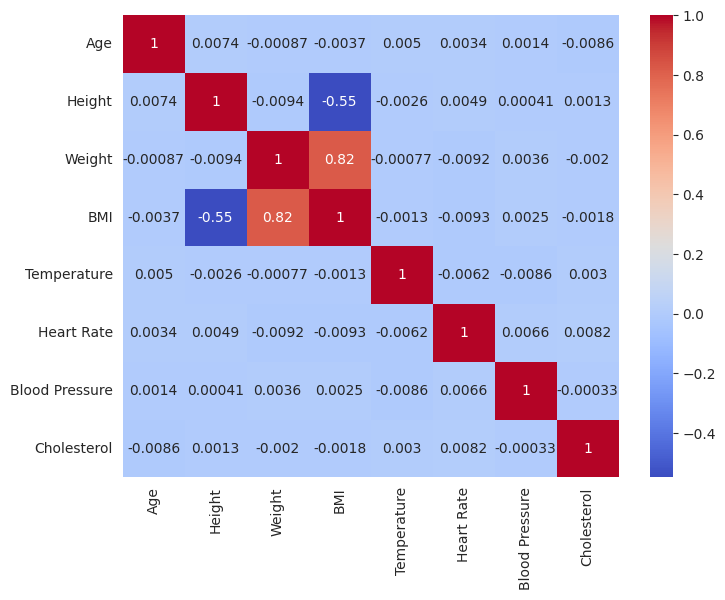

In [35]:
# Compute correlation matrix
corr = df1[['Age', 'Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol']].corr()
# Set figure size
plt.figure(figsize=(8, 6))  # Increase the figure size (width, height)
# Plot a heatmap of the correlation matrix with annotations and the 'coolwarm' color map
sns.heatmap(corr, annot=True, cmap='coolwarm')
# Show the plot
plt.show()

> 1. Which columns are most strongly correlated with each other?

> Answer : BMI and weight.

> 2. Which columns show the weakest correlation with each other?

> Answer : BMI and height.

> 3. Based on the correlation matrix, do taller individuals tend to weigh more?

> Answer : No, infact its opposite, its sightly decreasing.

### 6. Data Preparation

> Two main goals in data pre-processing:

1. Clean the data to address data quality issues (We've already done this part).

2. Transform the raw data to make it suitable for model building.

In [36]:
# check for categorical columns to convert it into numerical form for model building
cat_cols

['Gender', 'Blood Type', 'Diabetes', 'Smoking']

> Use **LabelEncoder** to transform our categorical column into numerical format.

> Example code :

In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
print("Gender dtype before encoding : ", df1['Gender'].dtypes)
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
print("Gender dtype after encoding : ", df1['Gender'].dtypes)

Gender dtype before encoding :  object
Gender dtype after encoding :  int64


> Similarly do for other categorical columns

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
print("Blood Type dtype before encoding : ", df1['Blood Type'].dtypes)
df1['Blood Type'] = label_encoder.fit_transform(df1['Blood Type'])
print("Blood Type dtype after encoding : ", df1['Blood Type'].dtypes)

Blood Type dtype before encoding :  object
Blood Type dtype after encoding :  int64


In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
print("Diabetes dtype before encoding : ", df1['Diabetes'].dtypes)
df1['Diabetes'] = label_encoder.fit_transform(df1['Diabetes'])
print("Diabetes dtype after encoding : ", df1['Diabetes'].dtypes)

Diabetes dtype before encoding :  object
Diabetes dtype after encoding :  int64


In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
print("Smoking dtype before encoding : ", df1['Smoking'].dtypes)
df1['Smoking'] = label_encoder.fit_transform(df1['Smoking'])
print("Smoking dtype after encoding : ", df1['Smoking'].dtypes)

Smoking dtype before encoding :  object
Smoking dtype after encoding :  int64


> The below code is performing feature scaling using StandardScaler to standardize (normalize) our numerical features to improve model performance.

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol']
df1[numerical_features] = scaler.fit_transform(df1[numerical_features])
df1.head()

,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.633360,1,-1.476797e-01,-1.515315,3,-1.233038,0.968889,1.102287,0.241707,-0.458151,1,0
1,-0.210758,0,-1.370475e+00,-0.943608,1,-0.161036,-0.726587,-1.104660,-1.149879,-1.598959,0,0
2,-0.415660,1,1.521085e-01,-1.623022,2,-1.416160,1.296559,-0.045325,0.798342,1.027552,0,1
3,1.633360,1,8.776699e-01,0.761408,1,0.044922,-0.275655,-1.281215,-1.358617,-0.643864,0,0
4,0.608850,1,1.994714e-15,1.309789,1,1.707425,-0.299080,-0.398437,-0.245348,-0.564273,0,0


### 7. Model Building

In this section, we'll focus on building a predictive model using the 'Diabetes' column as our target variable. The goal is to predict whether a person has diabetes or not based on other features.

**Splitting our features and target**

In [42]:
# Split the dataset into training and testing sets (assuming df1 is preprocessed)
X = df1.drop(columns=['Diabetes'])  # Replace 'Target' with your actual target column
y = df1['Diabetes']  # Define the target variable

**Split data into training and testing set**

In [43]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (40000, 11)
X_test shape: (10000, 11)
y_train shape: (40000,)
y_test shape: (10000,)


**Model Training**

> For this workshop we will be training our model using the below ML algorithms as well as compare them.

* Logistic Regression
* Support Vector Machine (SVM)
* Random Forest
* K-Nearest Neighbors

In [44]:
# Import Necessary Libraries for Model Building
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

> Logistic Regression

In [45]:
model1 = LogisticRegression()  # Initialize logistic regression model
model1.fit(X_train, y_train)  # Train the model on training data
y_pred1 = model1.predict(X_test)  # Predict target values for test set
accuracy1 = accuracy_score(y_test, y_pred1)  # Calculate model accuracy
accuracy1

0.9005

> Support Vector Machine (SVM)

In [46]:
model2 = SVC(kernel='linear')  # Initialize SVM model with linear kernel
model2.fit(X_train, y_train)  # Train the model on training data
y_pred2 = model2.predict(X_test)  # Predict target values for test set
accuracy2 = accuracy_score(y_test, y_pred2)  # Calculate model accuracy
accuracy2

0.9005

> Random Forest

In [47]:
model3 = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize Random Forest with 100 trees
model3.fit(X_train, y_train)  # Train the model on training data
y_pred3 = model3.predict(X_test)  # Predict target values for test set
accuracy3 = accuracy_score(y_test, y_pred3)  # Calculate model accuracy
accuracy3

0.9181

> K-Nearest Neighbors

In [48]:
model4 = KNeighborsClassifier(n_neighbors=5)  # Initialize KNN with 5 neighbors
model4.fit(X_train, y_train)  # Train the model on training data
y_pred4 = model4.predict(X_test)  # Predict target values for test set
accuracy4 = accuracy_score(y_test, y_pred4)  # Calculate model accuracy
accuracy4

0.8921

> Display Accuracies

In [49]:
# Print the accuracy of all models
print("Accuracy of Logistic Regression : ", accuracy1)
print("Accuracy of SVM : ", accuracy2)
print("Accuracy of Random Forest : ", accuracy3)
print("Accuracy of K-Nearest Neighbors : ", accuracy4)

Accuracy of Logistic Regression :  0.9005
Accuracy of SVM :  0.9005
Accuracy of Random Forest :  0.9181
Accuracy of K-Nearest Neighbors :  0.8921


> *At first glance, all models seem to perform well, but accuracy alone can be misleading, especially in imbalanced datasets. A model might achieve high accuracy simply by predicting the majority class while failing to detect the minority class. To avoid such mistakes, it is important to use other metrics, such as Precision, Recall, F1-Score, and the Confusion Matrix, when evaluating a classification model*



### 8. Model Evaluation

> Since, our model is of classification type we will be using the following metrics to evaluate our model.

* Confusion Matrix : The Confusion Matrix is a table that displays the performance of a classification model by showing the actual vs predicted labels. It consists of:
  1. True Positives (TP): Correctly predicted positive cases.
  2. True Negatives (TN): Correctly predicted negative cases.
  3. False Positives (FP): Incorrectly predicted as positive.
  4. False Negatives (FN): Incorrectly predicted as negative.
  
* Precison : Precision is the ratio of correct positive predictions to all predicted positive instances. It tells you how many of the predicted positive cases were actually correct.

* Recall : Recall is the ratio of correct positive predictions to all actual positive instances. It measures how well the model identifies all positive cases.

* F1-Score : F1-Score is the harmonic mean of Precision and Recall, balancing both metrics. It’s especially useful when the dataset has an uneven class distribution (e.g., when there are more negatives than positives).



> Confusion Matrix

In [50]:
# Store predictions from different models in a dictionary
model_preds = {
    "Logistic Regression" : y_pred1,
    "Support Vector Machine" : y_pred2,
    "Random Forest" : y_pred3,
    "K-Nearest Neighbors": y_pred4
}

# Iterate through each model and plot its confusion matrix
for model, pred in model_preds.items():
    print("model : ", model)
    print(confusion_matrix(y_test, pred))  # Display confusion matrix for each model
    print('----------------------------')

model :  Logistic Regression
[[9005    0]
 [ 995    0]]
----------------------------
model :  Support Vector Machine
[[9005    0]
 [ 995    0]]
----------------------------
model :  Random Forest
[[9005    0]
 [ 819  176]]
----------------------------
model :  K-Nearest Neighbors
[[8898  107]
 [ 972   23]]
----------------------------


> As we suspected, accuracy alone was misleading. Despite some models showing seemingly high accuracy, their confusion matrices reveal significant shortcomings in detecting the minority class.

> Classification Report

In [51]:
# Iterate through each model and display its classification report
for model, pred in model_preds.items():
    print("model : ", model)
    print(classification_report(y_test, pred, zero_division=0))  # Display classification report for each model
    print('----------------------------')

model :  Logistic Regression
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9005
           1       0.00      0.00      0.00       995

    accuracy                           0.90     10000
   macro avg       0.45      0.50      0.47     10000
weighted avg       0.81      0.90      0.85     10000

----------------------------
model :  Support Vector Machine
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9005
           1       0.00      0.00      0.00       995

    accuracy                           0.90     10000
   macro avg       0.45      0.50      0.47     10000
weighted avg       0.81      0.90      0.85     10000

----------------------------
model :  Random Forest
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9005
           1       1.00      0.18      0.30       995

    accuracy                           0

>The evaluation of the models shows that despite high accuracy, all models struggle to detect the minority class (class 1).

> Why is this happening ?

* The dataset is highly imbalanced (8071 majority class vs. 900 minority class).

* Most models are biased towards class 0, making them ineffective for detecting class 1.

* Accuracy is misleading here (~90%) because it is mostly driven by correct class 0 predictions.

> How to solve this issue ?

> Answer : Below are some strategies we can try to solve such issues:

1. Class Imbalance Handling:
  * Resampling: Since it looks like the data might be imbalanced (a common issue in classification problems), try oversampling the minority class (positive class) or undersampling the majority class (negative class).
    * Oversampling: Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can generate synthetic samples for the minority class.
    * Undersampling: Reduce the number of instances of the majority class to balance the dataset.
  * Class Weights: Many algorithms, such as logistic regression, SVM, and random forests, have parameters to handle class weights. For example, you can assign a higher weight to the minority class to make the model pay more attention to it.

2. Model Hyperparameter Tuning:
* For models like Random Forest and SVM, adjusting hyperparameters can help improve the balance between precision and recall for each class.
* For Random Forest, try tuning parameters like n_estimators, max_depth, and min_samples_split.
* For SVM, you can experiment with the C parameter (which controls the trade-off between achieving a low error on the training set and a low-complexity model) and kernel choice.

3. Try Different Algorithms:
* Some models handle imbalanced data better than others. For instance, Gradient Boosting Machines (GBM) or XGBoost are generally more robust to imbalanced datasets. Try out different algorithms to see if they handle the imbalance better.

4. Cross-validation:

* Ensure you're using stratified k-fold cross-validation when evaluating the model to ensure that the proportion of positive and negative samples is similar across training and validation splits.

# Part II

> This section of the workshop is for practice and should be completed after finishing Part I. The tasks are similar to those in Part I, but the dataset used here is different.

## Dataset 2 : *Workout Fitness Tracker*

* About dataset ( csv filename : workout_fitness_tracker_data.csv)

> This dataset contains 10,000 records of workout and fitness-related data collected from various fitness apps and devices.

> It is designed to help analyze and predict workout efficiency based on user activity, health metrics, and lifestyle factors.

> Potential Use cases includes:

1. Predicting Workout Efficiency based on different metrics.

2. Analyzing the impact of sleep and nutrition on workout performance.

3. Finding correlations between heart rate, workout type, and calories burned.

4. Developing AI/ML models to suggest personalized workout plans.

5. Tracking fitness habits and their effect on mood.

> Dataset features

1. *User ID*: Unique identifier for each user
2. *Age*: User’s age (18-60 years)
3. *Gender*: Male, Female, Other
4. *Height (cm)*: User’s height in centimeters
5. *Weight (kg)*: User’s weight in kilograms
6. *Workout Type*: Type of workout (Cardio, Strength, Yoga, HIIT, Cycling, Running)
7. *Workout Duration (mins)*: Total time spent in workout
8. *Calories Burned*: Total calories burned during workout
9. *Heart Rate (bpm)*: Average heart rate during the workout
10. *Steps Taken*: Number of steps recorded (for walking/running workouts)
11. *Distance (km)*: Distance covered in kilometers
12. *Workout Intensity*: Low, Medium, High
13. *Sleep Hours*: Hours of sleep before the workout
14. *Water Intake (liters)*: Water consumed in liters
15. *Daily Calories Intake*: Total calories consumed in a day
16. *Resting Heart Rate (bpm)*: Heart rate when at rest
17. *VO2 Max*: Oxygen consumption capacity (indicator of cardiovascular fitness)
18. *Body Fat (%)*: Estimated body fat percentage
19. *Mood Before Workout*: Mood before the workout (Happy, Neutral, Tired, Stressed)
20. *Mood After Workout*: Mood after the workout (Energized, Neutral, Fatigued)

### 1. Load Dataset

In [52]:
df = pd.read_csv("/content/drive/MyDrive/AI/workout_fitness_tracker_data.csv")

In [53]:
df.head()

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


### 2. Data Analysis

In [54]:
shape = df.shape
print("Shape = {}".format(shape))

Shape = (10000, 20)


In [55]:
df.sample(n=5)

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
1032,1033,58,Male,190,79,HIIT,62,778,80,18510,4.77,Medium,5.7,1.9,2945,84,38.4,28.5,Neutral,Fatigued
8826,8827,43,Male,186,78,HIIT,17,179,82,9056,8.33,High,6.3,1.9,3114,65,38.4,28.5,Neutral,Neutral
3650,3651,34,Other,181,106,Cardio,10,107,173,16128,0.66,Low,6.5,1.9,3200,60,38.4,28.5,Happy,Neutral
7763,7764,36,Other,193,75,Strength,54,668,99,19290,1.21,High,5.5,1.9,2032,66,38.4,28.5,Tired,Fatigued
4169,4170,30,Male,170,114,Strength,103,874,123,1045,2.95,Medium,4.3,1.9,2459,77,38.4,28.5,Tired,Energized


In [56]:
df.dtypes

,0
User ID,int64
Age,int64
Gender,object
Height (cm),int64
Weight (kg),int64
Workout Type,object
Workout Duration (mins),int64
Calories Burned,int64
Heart Rate (bpm),int64
Steps Taken,int64


In [57]:
num_cols=[i for i in df.columns if df[i].dtypes=="float64"]
cat_cols=[i for i in df.columns if df[i].dtypes=="object"]

In [58]:
print("Numerical columns : ", num_cols)
print("Categorical columns : ", cat_cols)
print("Number of numerical columns : ", len(num_cols))
print("Number of categorcal columns : ", len(cat_cols))

Numerical columns :  ['Distance (km)', 'Sleep Hours', 'Water Intake (liters)', 'VO2 Max', 'Body Fat (%)']
Categorical columns :  ['Gender', 'Workout Type', 'Workout Intensity', 'Mood Before Workout', 'Mood After Workout']
Number of numerical columns :  5
Number of categorcal columns :  5


In [59]:
df.describe()

,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.0
mean,5000.50000,38.390100,174.275100,84.903000,64.464800,552.100800,129.526700,10455.496600,7.820745,6.982820,1.900000e+00,2748.428800,69.486500,3.840000e+01,28.5
std,2886.89568,12.171637,14.440986,20.189937,31.814946,260.629908,28.874152,5486.423716,4.159148,1.708738,2.109529e-14,717.109026,11.566763,4.590336e-12,0.0
min,1.00000,18.000000,150.000000,50.000000,10.000000,100.000000,80.000000,1000.000000,0.500000,4.000000,1.900000e+00,1500.000000,50.000000,3.840000e+01,28.5
25%,2500.75000,28.000000,162.000000,67.000000,37.000000,325.000000,105.000000,5673.000000,4.240000,5.500000,1.900000e+00,2124.000000,60.000000,3.840000e+01,28.5
50%,5000.50000,38.000000,174.000000,85.000000,64.000000,554.000000,130.000000,10434.500000,7.850000,7.000000,1.900000e+00,2753.000000,69.000000,3.840000e+01,28.5
75%,7500.25000,49.000000,187.000000,102.000000,92.000000,776.000000,155.000000,15211.000000,11.410000,8.400000,1.900000e+00,3360.000000,80.000000,3.840000e+01,28.5
max,10000.00000,59.000000,199.000000,119.000000,119.000000,999.000000,179.000000,19998.000000,15.000000,10.000000,1.900000e+00,3999.000000,89.000000,3.840000e+01,28.5


In [60]:
df[cat_cols].value_counts()

Gender  Workout Type  Workout Intensity  Mood Before Workout  Mood After Workout
Female  Cycling       Medium             Neutral              Neutral               27
        Running       Medium             Stressed             Neutral               26
Other   Strength      Low                Neutral              Fatigued              26
Male    Cardio        Low                Stressed             Energized             26
Other   Yoga          High               Happy                Energized             26
                                                                                    ..
        Strength      High               Tired                Energized              7
        HIIT          High               Stressed             Neutral                7
Male    Yoga          Low                Happy                Energized              6
Female  Running       Medium             Neutral              Energized              6
Male    Strength      Medium             Happy                Neutral                6
Name: count, Length: 648, dtype: int64

### 3. CLeaning Data

In [61]:
df.drop(columns=["User ID"], inplace=True)


In [62]:
print(df.columns.tolist())

['Age', 'Gender', 'Height (cm)', 'Weight (kg)', 'Workout Type', 'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Workout Intensity', 'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)', 'Mood Before Workout', 'Mood After Workout']


In [63]:
df.duplicated().sum()

0

In [64]:
print(f"Rows before removing duplicates: {df.shape[0]}")
df.drop_duplicates(inplace=True)
print(f"Rows after removing duplicates: {df.shape[0]}")

Rows before removing duplicates: 10000
Rows after removing duplicates: 10000


In [65]:
df.isnull().sum()

,0
Age,0
Gender,0
Height (cm),0
Weight (kg),0
Workout Type,0
Workout Duration (mins),0
Calories Burned,0
Heart Rate (bpm),0
Steps Taken,0
Distance (km),0


In [66]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outliers[col] = outlier_count
    return outliers

# Detect outliers
outliers_iqr = detect_outliers_iqr(df, columns=num_cols)

# Print number of outliers in each numerical column
print("Outliers detected using IQR method:")
for col, count in outliers_iqr.items():
    print(f"{col}: {count} outliers")

Outliers detected using IQR method:
Distance (km): 0 outliers
Sleep Hours: 0 outliers
Water Intake (liters): 0 outliers
VO2 Max: 0 outliers
Body Fat (%): 0 outliers


### 4. Data Visualisation

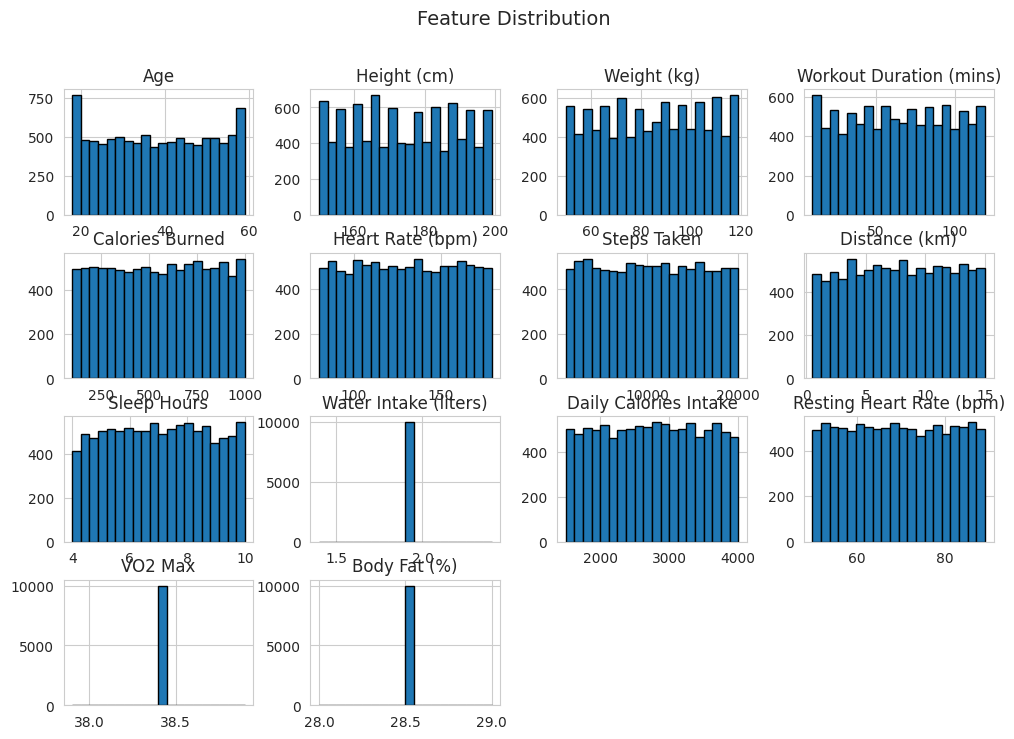

In [67]:
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distribution", fontsize=14)
plt.show()

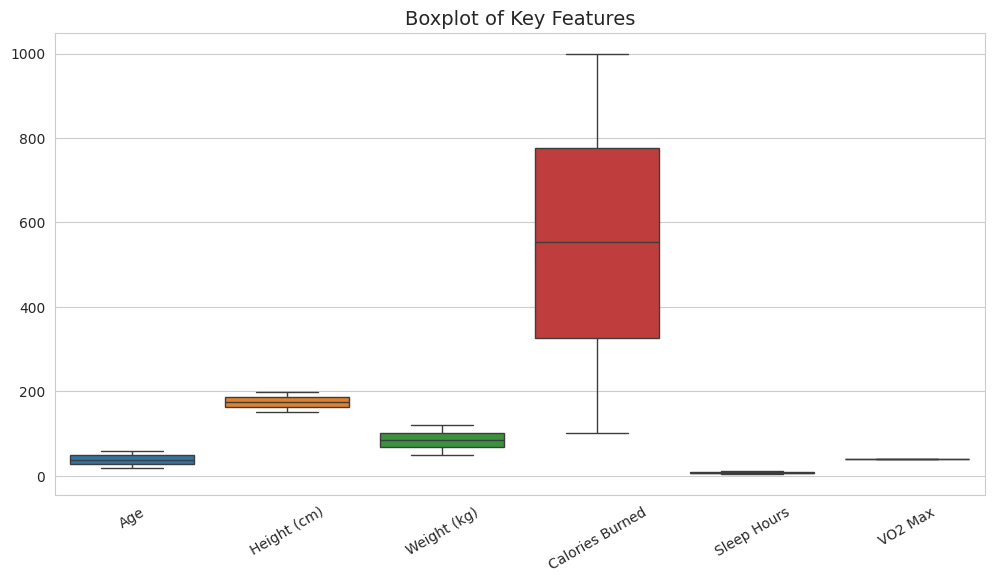

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Height (cm)', 'Weight (kg)', 'Calories Burned', 'Sleep Hours', 'VO2 Max']])
plt.title("Boxplot of Key Features", fontsize=14)
plt.xticks(rotation=30)
plt.show()

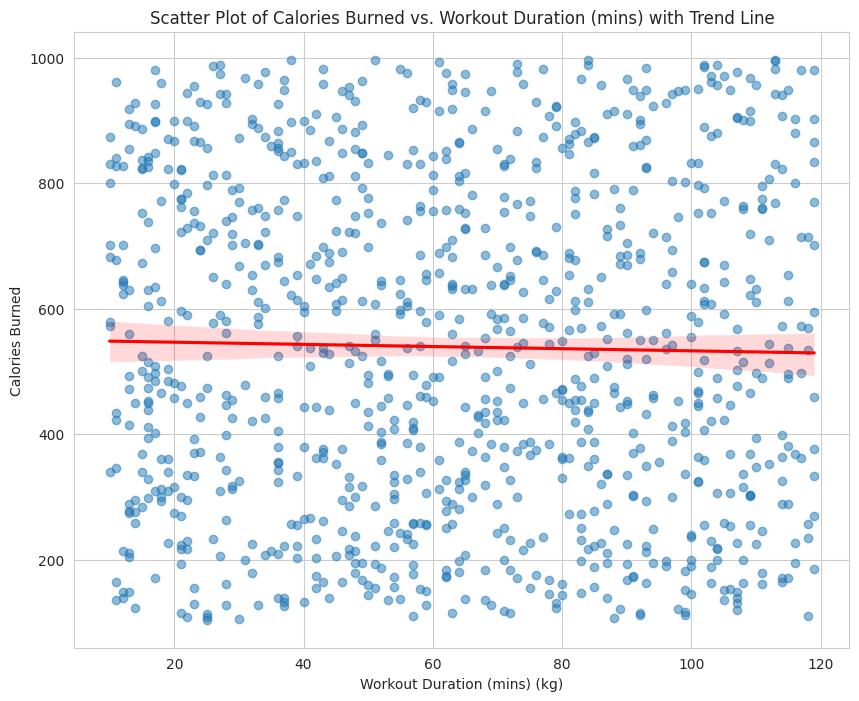

In [69]:
# Randomly sample 1000 rows from the DataFrame 'df' and store it in 'df_sampled'
df_sampled = df.sample(1000)
# Set the figure size for the plot
plt.figure(figsize=(10, 8))
# Create a regression plot (scatter plot with a trend line) for 'Workout Duration (mins)' vs 'Calories Burned'
# scatter_kws controls the transparency of the scatter points, and line_kws sets the color of the trend line
sns.regplot(x=df_sampled['Workout Duration (mins)'], y=df_sampled['Calories Burned'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
# Set the title of the plot
plt.title('Scatter Plot of Calories Burned vs. Workout Duration (mins) with Trend Line')
# Set the labels for the x and y axes
plt.xlabel('Workout Duration (mins) (kg)')
plt.ylabel('Calories Burned')
# Enable grid lines on the plot
plt.grid(True)
# Display the plot
plt.show()

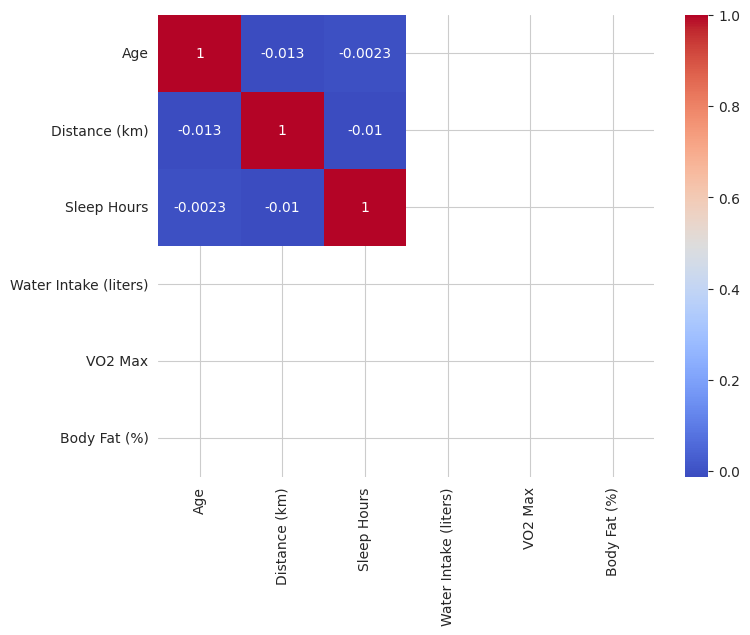

In [70]:
# Compute correlation matrix
corr = df[['Age', 'Distance (km)', 'Sleep Hours', 'Water Intake (liters)', 'VO2 Max', 'Body Fat (%)']].corr()
# Set figure size
plt.figure(figsize=(8, 6))  # Increase the figure size (width, height)
# Plot a heatmap of the correlation matrix with annotations and the 'coolwarm' color map
sns.heatmap(corr, annot=True, cmap='coolwarm')
# Show the plot
plt.show()

### 5. Data Preparation

In [71]:
cat_cols

['Gender',
 'Workout Type',
 'Workout Intensity',
 'Mood Before Workout',
 'Mood After Workout']

In [72]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
print("Gender dtype before encoding : ", df['Gender'].dtypes)
df['Gender'] = label_encoder.fit_transform(df['Gender'])
print("Gender dtype after encoding : ", df['Gender'].dtypes)

Gender dtype before encoding :  object
Gender dtype after encoding :  int64


In [73]:
label_encoder = LabelEncoder()
print("Workout Type dtype before encoding : ", df['Workout Type'].dtypes)
df['Workout Type'] = label_encoder.fit_transform(df['Workout Type'])
print("Workout Type dtype after encoding : ", df['Workout Type'].dtypes)

Workout Type dtype before encoding :  object
Workout Type dtype after encoding :  int64


In [74]:
label_encoder = LabelEncoder()
print("Workout Intensity dtype before encoding : ", df['Workout Intensity'].dtypes)
df['Workout Intensity'] = label_encoder.fit_transform(df['Workout Intensity'])
print("Workout Intensity dtype after encoding : ", df['Workout Intensity'].dtypes)

Workout Intensity dtype before encoding :  object
Workout Intensity dtype after encoding :  int64


In [75]:
label_encoder = LabelEncoder()
print("Mood Before Workout dtype before encoding : ", df['Mood Before Workout'].dtypes)
df['Mood Before Workout'] = label_encoder.fit_transform(df['Mood Before Workout'])
print("Mood Before Workout dtype after encoding : ", df['Mood Before Workout'].dtypes)

Mood Before Workout dtype before encoding :  object
Mood Before Workout dtype after encoding :  int64


In [76]:
label_encoder = LabelEncoder()
print("Mood After Workout dtype before encoding : ", df['Mood After Workout'].dtypes)
df['Mood After Workout'] = label_encoder.fit_transform(df['Mood After Workout'])
print("Mood After Workout dtype after encoding : ", df['Mood After Workout'].dtypes)

Mood After Workout dtype before encoding :  object
Mood After Workout dtype after encoding :  int64


In [77]:
num_cols

['Distance (km)',
 'Sleep Hours',
 'Water Intake (liters)',
 'VO2 Max',
 'Body Fat (%)']

In [78]:
scaler = StandardScaler()
numerical_features = ['Distance (km)',
 'Sleep Hours',
 'Water Intake (liters)',
 'VO2 Max',
 'Body Fat (%)']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,39,1,175,99,1,79,384,112,8850,1.591573,0,0.712363,2.220446e-16,3195,61,7.105427e-15,0.0,3,1
1,36,2,157,112,0,73,612,168,2821,-1.615976,0,0.946465,2.220446e-16,2541,73,7.105427e-15,0.0,0,0
2,25,0,180,66,2,27,540,133,18898,-0.130020,0,1.648773,2.220446e-16,3362,80,7.105427e-15,0.0,0,1
3,56,1,154,89,1,39,672,118,14102,-0.305545,2,-0.692253,2.220446e-16,2071,65,7.105427e-15,0.0,1,2
4,53,2,194,59,4,56,410,170,16518,-1.118253,2,0.185632,2.220446e-16,3298,59,7.105427e-15,0.0,2,0


### 6. Model Building

In [79]:
X = df.drop(columns=['Weight (kg)'])  # Replace 'Target' with your actual target column
y = df['Weight (kg)']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8000, 18)
X_test shape: (2000, 18)
y_train shape: (8000,)
y_test shape: (2000,)


In [81]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import LinearSVR

Linear Regression

In [82]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred1 = linear_model.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error (MSE):", mse1)
print("R-squared (R2) Score:", r2_score(y_test, y_pred1))

Mean Squared Error (MSE): 400.8792121831798
R-squared (R2) Score: -0.001711521710364039


SVR

In [83]:
svregressor = LinearSVR(epsilon=1.0, C=0.1, max_iter=10000)
svregressor.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred2 = svregressor.predict(X_test)

mse2 = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print("Mean Squared Error (MSE):", mse2)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 685.1666523031447
R-squared (R2) Score: -0.7120851095420722


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest Regressor

In [84]:
rfregressor=RandomForestRegressor(n_estimators=100,random_state=42)
rfregressor.fit(X_train,y_train)
y_pred3=rfregressor.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred3)
print("Mean Squared Error (MSE):", mse3)
print("R-squared (R2) Score:", r2_score(y_test, y_pred3))

Mean Squared Error (MSE): 407.46560250000005
R-squared (R2) Score: -0.018169504230609146


K Neighbors Regressor

In [85]:
knnregressor=KNeighborsRegressor(n_neighbors=5)
knnregressor.fit(X_train,y_train)
y_pred4=knnregressor.predict(X_test)
mse4 = mean_squared_error(y_test, y_pred4)
print("Mean Squared Error (MSE):", mse4)
print("R-squared (R2) Score:", r2_score(y_test, y_pred4))

Mean Squared Error (MSE): 483.5216
R-squared (R2) Score: -0.20821719609274458


### 7. Model Evaluation

In [86]:
model_preds = {
    "Linear Regression" :mse1,
    "Support Vector Machine" : mse2,
    "Random Forest" : mse3,
    "K-Nearest Neighbors": mse4
}
for (key,value) in model_preds.items():
  print(key,value)

Linear Regression 400.8792121831798
Support Vector Machine 685.1666523031447
Random Forest 407.46560250000005
K-Nearest Neighbors 483.5216
